## Preparing

In [1]:
%run ./Setting_Process.ipynb

## Set Data

In [4]:
df_review = pd.read_csv('./review_complete.csv')

In [5]:
np.random.seed(10)

In [6]:
randomization = np.random.choice(2,df_review.shape[0] , p=[0.8, 0.2])

In [7]:
synopses = list(df_review['comments'].values.astype('U'))
review = []
for i in range(len(synopses)):
    if randomization[i] == 1:
        review.append(synopses[i])
    

In [8]:
len(review)

58016

In [9]:
def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

In [10]:
normalized_toy_corpus = normalize_corpus(review)

## Topic Modeling - Bag of words

In [7]:
bow_vectorizer = CountVectorizer()
bow_toy_corpus = bow_vectorizer.fit_transform(normalized_toy_corpus)
bow_feature_names_toy_corpus = bow_vectorizer.get_feature_names()

In [8]:
bow_table = pd.DataFrame(data = bow_toy_corpus.todense(), columns = bow_feature_names_toy_corpus)

In [31]:
no_topics = 5
doc_topic_prior_toy = 0.5  # alpha > 0
topic_word_prior_toy = 0.5 # beta > 0
lda_toy_corpus = LatentDirichletAllocation(n_components=no_topics, 
                                           doc_topic_prior = doc_topic_prior_toy,
                                           topic_word_prior = topic_word_prior_toy).fit(bow_toy_corpus)

In [32]:
no_top_words = 10
display_topics(lda_toy_corpus, bow_feature_names_toy_corpus, no_top_words)

Topic 0:
home stay house beautiful experience love place great like feel
Topic 1:
great place location stay nice clean really easy restaurant close
Topic 2:
room bed bathroom stay clean place nice would night good
Topic 3:
us walk park away apartment city minute even stay need
Topic 4:
stay recommend host place would great clean san highly everything


In [33]:
topic_words = get_topic_words(vectorizer = bow_vectorizer, 
                              lda_model = lda_toy_corpus, 
                              n_words = no_top_words)
# pd.DataFrame(topic_words, 
#              columns = ["word_" + str(i) for i in range(no_top_words)],
#              index = ["Topic_" + str(i) for i in range(len(topic_words))]) 

In [34]:
word_weights = lda_toy_corpus.components_ / lda_toy_corpus.components_.sum(axis=1)[:, np.newaxis]
topic_1_words = pd.DataFrame(data = word_weights[0], index = bow_feature_names_toy_corpus)
topic_2_words = pd.DataFrame(data = word_weights[1], index = bow_feature_names_toy_corpus)
tw = pd.concat([topic_1_words,topic_2_words],axis = 1)
# tw.T

In [35]:
word_weights = lda_toy_corpus.components_ / lda_toy_corpus.components_.sum(axis=1)[:, np.newaxis]
word_weights_df = pd.DataFrame(word_weights.T, 
                               index = bow_feature_names_toy_corpus, 
                               columns = ["Topic_" + str(i) for i in range(no_topics)])
# word_weights_df.head(10)

In [36]:
lda_news_output = lda_toy_corpus.transform(bow_toy_corpus)

In [37]:
doc_names = ["Doc_" + str(i) for i in range(len(normalized_toy_corpus))]
topic_names = ["Topic_" + str(i) for i in range(no_topics)]
df_document_topic = pd.DataFrame(np.round(lda_news_output, 4), columns=topic_names, index=doc_names)
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
#df_document_topic[:10]

In [38]:
pyLDAvis.enable_notebook()
visualization_panel = pyLDAvis.sklearn.prepare(lda_toy_corpus, bow_toy_corpus, bow_vectorizer, mds='tsne')
visualization_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3       29.237839   -3.477900       1        1  22.156328
2       59.457607 -123.841095       2        1  21.122710
4      112.892822  -48.920338       3        1  19.732280
1      -28.508348 -150.868561       4        1  18.805454
0      -45.190781  -57.140923       5        1  18.183227, topic_info=      Category          Freq          Term         Total  loglift  logprob
term                                                                      
8618   Default  37665.000000         great  37665.000000  30.0000  30.0000
9331   Default  11210.000000          home  11210.000000  29.0000  29.0000
20481  Default  13067.000000            us  13067.000000  28.0000  28.0000
15854  Default  12476.000000     recommend  12476.000000  27.0000  27.0000
16594  Default  15213.000000          room  15213.000000  26.0000  26.0000
11638  Default  18333.000000      location  18333.000000  25.0000  25.0000
14746  Default  33549.000000         place  33549.000000  24.0000  24.0000
9495   Default  10237.000000         house  10237.000000  23.0000  23.0000
9220   Default   5629.000000        highly   5629.000000  22.0000  22.0000
18354  Default  38618.000000          stay  38618.000000  21.0000  21.0000
9441   Default  18860.000000          host  18860.000000  20.0000  20.0000
13359  Default  13916.000000          nice  13916.000000  19.0000  19.0000
2115   Default   4862.000000      bathroom   4862.000000  18.0000  18.0000
20934  Default   9398.000000          walk   9398.000000  17.0000  17.0000
16274  Default   7036.000000    restaurant   7036.000000  16.0000  16.0000
3905   Default  18175.000000         clean  18175.000000  15.0000  15.0000
15754  Default   9732.000000        really   9732.000000  14.0000  14.0000
21440  Default  15533.000000         would  15533.000000  13.0000  13.0000
2186   Default   6747.000000     beautiful   6747.000000  12.0000  12.0000
9139   Default   5883.000000       helpful   5883.000000  11.0000  11.0000
14234  Default   6429.000000          park   6429.000000  10.0000  10.0000
21364  Default   6226.000000     wonderful   6226.000000   9.0000   9.0000
2214   Default   7398.000000           bed   7398.000000   8.0000   8.0000
16848  Default  10540.000000           san  10540.000000   7.0000   7.0000
3979   Default   7345.000000         close   7345.000000   6.0000   6.0000
6279   Default   9872.000000          easy   9872.000000   5.0000   5.0000
1339   Default  12158.000000     apartment  12158.000000   4.0000   4.0000
7868   Default   8831.000000     francisco   8831.000000   3.0000   3.0000
1872   Default   4139.000000          away   4139.000000   2.0000   2.0000
7963   Default   5413.000000      friendly   5413.000000   1.0000   1.0000
...        ...           ...           ...           ...      ...      ...
2562    Topic5    305.999232           bnb    379.500229   1.4894  -6.8309
11780   Topic5   3038.224968          love   6391.898330   0.9609  -4.5354
7409    Topic5   1867.272006          felt   3534.461858   1.0666  -5.0222
20741   Topic5   2432.676180          view   5019.487234   0.9803  -4.7577
11479   Topic5   2881.076866          like   6305.928791   0.9213  -4.5886
21364   Topic5   2553.075924     wonderful   6226.093624   0.8132  -4.7094
801     Topic5   1862.666681        airbnb   4198.437194   0.8920  -5.0247
9866    Topic5    514.438835    incredible    761.895301   1.3119  -6.3114
8521    Topic5    576.662014      gorgeous    898.390031   1.2613  -6.1972
18354   Topic5   8785.472823          stay  38618.566739   0.2240  -3.4736
6629    Topic5   2078.874087         enjoy   5438.921617   0.7429  -4.9149
7960    Topic5    994.484205        friend   1957.148703   1.0277  -5.6522
7263    Topic5   1267.803914        family   2992.273008   0.8459  -5.4094
7542    Topic5   1276.795025         first   3116.610520   0.8123  -5.4024
21111   Topic5   1562.8774

## Topic Modeling - TF-IDF

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', norm = 'l2')
tfidf_toy_corpus = tfidf_vectorizer.fit_transform(normalized_toy_corpus)
tfidf_feature_names_toy_corpus = tfidf_vectorizer.get_feature_names()

In [12]:
tfidf_table = pd.DataFrame(data = tfidf_toy_corpus.todense(), columns = tfidf_feature_names_toy_corpus)

In [25]:
no_topics = 5
doc_topic_prior_toy = 0.5  # alpha > 0
topic_word_prior_toy = 0.5 # beta > 0
lda_tfidf_corpus = LatentDirichletAllocation(n_components=no_topics, 
                                           doc_topic_prior = doc_topic_prior_toy,
                                           topic_word_prior = topic_word_prior_toy).fit(tfidf_toy_corpus)

In [26]:
no_top_words = 10
display_topics(lda_tfidf_corpus, tfidf_feature_names_toy_corpus, no_top_words)

Topic 0:
great place stay location host recommend clean definitely really comfortable
Topic 1:
perfect value price location expect good hotel host stay wonderful
Topic 2:
home look michael stay lovely time room pleasant feel description
Topic 3:
walk easy close restaurant park apartment stay room bed quiet
Topic 4:
nice house view apartment clean great host room good stay


In [41]:
topic_words_idf = get_topic_words(vectorizer = tfidf_vectorizer, 
                              lda_model = lda_tfidf_corpus, 
                              n_words = no_top_words)

In [42]:
word_weights = lda_tfidf_corpus.components_ / lda_tfidf_corpus.components_.sum(axis=1)[:, np.newaxis]
topic_1_words = pd.DataFrame(data = word_weights[0], index = tfidf_feature_names_toy_corpus)
topic_2_words = pd.DataFrame(data = word_weights[1], index = tfidf_feature_names_toy_corpus)
tw = pd.concat([topic_1_words,topic_2_words],axis = 1)

In [43]:
word_weights = lda_tfidf_corpus.components_ / lda_tfidf_corpus.components_.sum(axis=1)[:, np.newaxis]
word_weights_df = pd.DataFrame(word_weights.T, 
                               index = tfidf_feature_names_toy_corpus, 
                               columns = ["Topic_" + str(i) for i in range(no_topics)])

In [44]:
lda_tfidf_output = lda_tfidf_corpus.transform(tfidf_toy_corpus)

In [45]:
doc_names = ["Doc_" + str(i) for i in range(len(normalized_toy_corpus))]
topic_names = ["Topic_" + str(i) for i in range(no_topics)]
df_document_topic = pd.DataFrame(np.round(lda_tfidf_output, 4), columns=topic_names, index=doc_names)
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
#df_document_topic[:10]

In [46]:
pyLDAvis.enable_notebook()
visualization_panel = pyLDAvis.sklearn.prepare(lda_tfidf_corpus, tfidf_toy_corpus, tfidf_vectorizer, mds='tsne')
visualization_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4       73.017258   -6.311345       1        1  29.391047
2      136.921631  -38.674232       2        1  27.690334
1       98.364555  -96.189407       3        1  14.729645
0       32.785927 -118.418388       4        1  14.380851
3       18.201681  -48.286495       5        1  13.808123, topic_info=      Category         Freq          Term        Total  loglift  logprob
term                                                                    
8552   Default  3048.000000         great  3048.000000  30.0000  30.0000
11559  Default  1886.000000      location  1886.000000  29.0000  29.0000
9373   Default  1773.000000          host  1773.000000  28.0000  28.0000
1538   Default   307.000000       arrival   307.000000  27.0000  27.0000
1859   Default   497.000000       awesome   497.000000  26.0000  26.0000
15391  Default   351.000000      question   351.000000  25.0000  25.0000
16133  Default   277.000000       respond   277.000000  24.0000  24.0000
6896   Default   351.000000       exactly   351.000000  23.0000  23.0000
12433  Default   227.000000       michael   227.000000  22.0000  22.0000
5149   Default   552.000000           day   552.000000  21.0000  21.0000
18227  Default  2480.000000          stay  2480.000000  20.0000  20.0000
14638  Default  2471.000000         place  2471.000000  19.0000  19.0000
3949   Default   760.000000         close   760.000000  18.0000  18.0000
19176  Default   521.000000        thanks   521.000000  17.0000  17.0000
7900   Default   745.000000      friendly   745.000000  16.0000  16.0000
2333   Default   446.000000          best   446.000000  15.0000  15.0000
20422  Default   275.000000         value   275.000000  14.0000  14.0000
15643  Default   928.000000        really   928.000000  13.0000  13.0000
16085  Default   172.000000   reservation   172.000000  12.0000  12.0000
18051  Default   456.000000          spot   456.000000  11.0000  11.0000
16163  Default   646.000000    restaurant   646.000000  10.0000  10.0000
19172  Default   484.000000         thank   484.000000   9.0000   9.0000
20845  Default   287.000000          warm   287.000000   8.0000   8.0000
3875   Default  1648.000000         clean  1648.000000   7.0000   7.0000
15399  Default   386.000000         quick   386.000000   6.0000   6.0000
18139  Default   165.000000         staff   165.000000   5.0000   5.0000
3148   Default   157.000000        cancel   157.000000   4.0000   4.0000
1259   Default   171.000000        answer   171.000000   3.0000   3.0000
14899  Default   150.000000       posting   150.000000   2.0000   2.0000
15743  Default  1236.000000     recommend  1236.000000   1.0000   1.0000
...        ...          ...           ...          ...      ...      ...
4543    Topic5   109.210426  conveniently   136.318651   1.7582  -5.6787
3431    Topic5    90.455359     centrally   113.651553   1.7516  -5.8671
672     Topic5    91.207615        advice   114.895845   1.7490  -5.8588
1859    Topic5   320.499072       awesome   497.046827   1.5411  -4.6021
20845   Topic5   198.092860          warm   287.316345   1.6081  -5.0832
2333    Topic5   271.469604          best   446.268789   1.4828  -4.7681
10537   Topic5    55.762086      jonathan    66.619309   1.8020  -6.3509
15065   Topic5   156.800083         price   246.622279   1.5270  -5.3170
5149    Topic5   288.928715           day   552.907954   1.3309  -4.7058
19172   Topic5   250.340536         thank   484.808837   1.3190  -4.8491
18051   Topic5   230.938286          spot   456.562422   1.2983  -4.9298
9373    Topic5   528.789133          host  1773.465211   0.7698  -4.1014
11553   Topic5   223.106158        locate   522.757667   1.1284  -4.9643
7042    Topic5   141.215956       explore   293.985382   1.2467  -5.4217
14702   Topic5   110.628173      pleasant   204.051022   1.3677  -5.6658
20965   Topic5   130.844607     welcoming   273

## K-means clustering

In [145]:
# choose 5000 items
n = list(np.random.choice(normalized_toy_corpus,5000))

In [146]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', norm = 'l2')
n_corpus = tfidf_vectorizer.fit_transform(n)
tfidf_feature_names_n_corpus = tfidf_vectorizer.get_feature_names()

In [147]:
no_topics = 5
doc_topic_prior_toy = 0.5  # alpha > 0
topic_word_prior_toy = 0.5 # beta > 0
lda_tfidf_n = LatentDirichletAllocation(n_components=no_topics, 
                                           doc_topic_prior = doc_topic_prior_toy,
                                           topic_word_prior = topic_word_prior_toy).fit(n_corpus)

In [148]:
# k-means clustering
from sklearn.cluster import KMeans

# number of clusters
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(n_corpus)
clusters = km.labels_.tolist()

In [149]:
for topic_idx, topic in enumerate(lda_tfidf_n.components_):
    top_words[topic_idx] = [tfidf_feature_names_n_corpus[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]

In [150]:
print ("<Document clustering result by K-means>")

#km.cluster_centers_ denotes the importances of each items in centroid.
#We need to sort it in decreasing-order and get the top k items.
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

Cluster_keywords_summary = {}
for i in range(num_clusters):
    print ("Cluster " + str(i) + " words:", end='')
#     Cluster_keywords_summary[i] = []
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        Cluster_keywords_summary[i] = top_words[i]
    print (top_words[i])

<Document clustering result by K-means>
Cluster 0 words:['value', 'price', 'accommodation', 'arrival', 'reservation', 'good', 'cancel', 'posting', 'automated', 'simple']
Cluster 1 words:['hostel', 'staff', 'forward', 'awesome', 'affordable', 'hotel', 'worth', 'jay', 'jan', 'paul']
Cluster 2 words:['john', 'guy', 'thank', 'place', 'sweet', 'good', 'work', 'cool', 'chris', 'stay']
Cluster 3 words:['jason', 'great', 'business', 'location', 'tom', 'immaculately', 'kathy', 'susan', 'strongly', 'host']
Cluster 4 words:['great', 'stay', 'place', 'location', 'host', 'clean', 'nice', 'room', 'apartment', 'recommend']


In [151]:
Cluster_keywords_summary

{0: ['value',
  'price',
  'accommodation',
  'arrival',
  'reservation',
  'good',
  'cancel',
  'posting',
  'automated',
  'simple'],
 1: ['hostel',
  'staff',
  'forward',
  'awesome',
  'affordable',
  'hotel',
  'worth',
  'jay',
  'jan',
  'paul'],
 2: ['john',
  'guy',
  'thank',
  'place',
  'sweet',
  'good',
  'work',
  'cool',
  'chris',
  'stay'],
 3: ['jason',
  'great',
  'business',
  'location',
  'tom',
  'immaculately',
  'kathy',
  'susan',
  'strongly',
  'host'],
 4: ['great',
  'stay',
  'place',
  'location',
  'host',
  'clean',
  'nice',
  'room',
  'apartment',
  'recommend']}

## Plot Cluster

In [152]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
tfidf_matrix_np=n_corpus.toarray()
pca.fit(tfidf_matrix_np)
X = pca.transform(tfidf_matrix_np)

xs, ys = X[:, 0], X[:, 1]

#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}
#set up cluster names using a dict
cluster_names = {}
for i in range(num_clusters):
    cluster_names[i] = ", ".join(Cluster_keywords_summary[i])

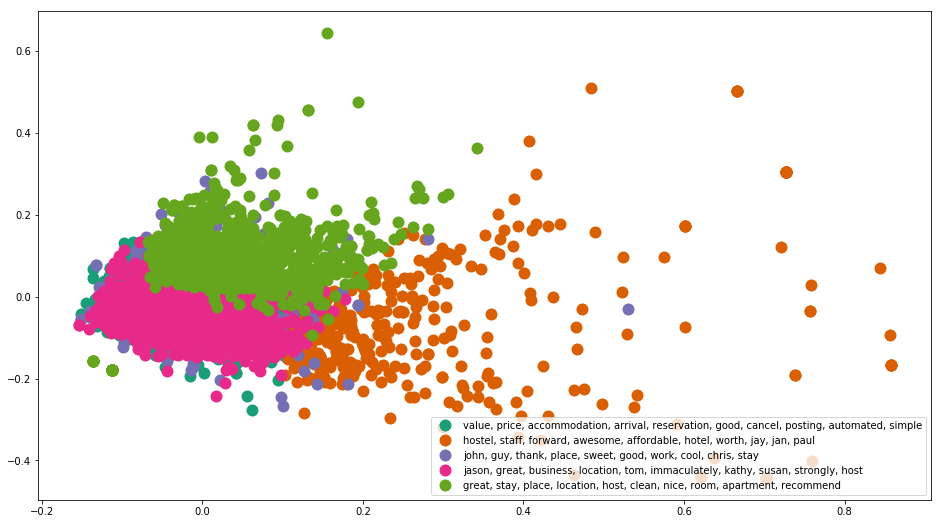

In [153]:
# %matplotlib inline 

#create data frame with PCA cluster results
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 
groups = df.groupby(clusters)

# set up plot
fig, ax = plt.subplots(figsize=(16, 9))
#Set color for each cluster/group
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')

ax.legend(numpoints=1,loc=4)  #show legend with only 1 point, position is right bottom.

plt.show() #show the plot

In [154]:
plt.close()

## WordCloud

In [155]:
normalized_toy_corpus

['holly place great would definitely stay neighborhood nice definitely felt safe walk around time day plus neighborhood neighborhood easy whether walk hop public transportation sometimes upstairs footstep easy hear early morning never keep would definitely stay',
 'great location near haight street close muni downtown friendly host help sunscreen lose luggage parcel delivery relaxing open onto garden plenty room would definitely stay',
 'great position explore san francisco close muni apartment warm comfortable access washing machine small garden wifi patchy variety good restaurant neighbourhood would certainly recommend accommodation',
 'apartment great location walk distance funky neighbourhood haight castro hayes valley mission public transport park playground end street meter apartment best whole city brilliant active kid apartment spacious stylish pack amenity holly ensure toddler plenty toy book rainy day want experience san fran like local lovely apartment great neighbourhood lo

In [165]:
dic = {}

In [166]:
for i in range(len(normalized_toy_corpus)):
    for j in normalized_toy_corpus[i].split(' '):
        if j not in dic.keys():
            dic[j] = 0
        else:
            dic[j] = dic[j] + 1

In [179]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

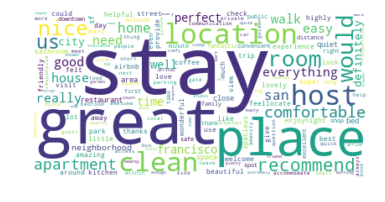

In [182]:
from wordcloud import WordCloud
#from pyecharts import WordCloud

import matplotlib.pyplot as plt
wordcloud = WordCloud(max_words=len(dic), background_color='white', relative_scaling=1,normalize_plurals=False).generate_from_frequencies(dic)

plt.imshow(wordcloud, interpolation='bilinear')
#plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")
plt.axis("off")
plt.show()

In [184]:
wordcloud.to_file('./wc.jpg')